In [5]:
# 파이썬으로 크롬 제어
from selenium import webdriver
# 문자열 파씽 라이브러리
from bs4 import BeautifulSoup
# 시간 라이브러리
import time
# 데이터분석 라이브러리
import pandas as pd

In [2]:
browser = webdriver.Chrome('C:/Users/user/pandasProject/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_11412\3355377312.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/user/pandasProject/chromedriver.exe')


In [6]:
# html 코드 전체 불러오기
html = browser.page_source
html

WebDriverException: Message: unknown error: unexpected command response
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x0034D953+2414931]
	Ordinal0 [0x002DF5E1+1963489]
	Ordinal0 [0x001CC6B8+837304]
	Ordinal0 [0x001BEB34+781108]
	Ordinal0 [0x001BE06A+778346]
	Ordinal0 [0x001BD646+775750]
	Ordinal0 [0x001BCEBC+773820]
	Ordinal0 [0x001BCD59+773465]
	Ordinal0 [0x001CDA70+842352]
	Ordinal0 [0x002240DB+1196251]
	Ordinal0 [0x002142B6+1131190]
	Ordinal0 [0x001EE860+976992]
	Ordinal0 [0x001EF756+980822]
	GetHandleVerifier [0x005BCC62+2510274]
	GetHandleVerifier [0x005AF760+2455744]
	GetHandleVerifier [0x003DEABA+551962]
	GetHandleVerifier [0x003DD916+547446]
	Ordinal0 [0x002E5F3B+1990459]
	Ordinal0 [0x002EA898+2009240]
	Ordinal0 [0x002EA985+2009477]
	Ordinal0 [0x002F3AD1+2046673]
	BaseThreadInitThunk [0x767E6739+25]
	RtlGetFullPathName_UEx [0x779C8FEF+1215]
	RtlGetFullPathName_UEx [0x779C8FBD+1165]


In [7]:
# 사람이 읽을 수 있게 태그 정리
soup = BeautifulSoup(html, 'html.parser')
soup

NameError: name 'html' is not defined

In [8]:
# 유튜브 채널 가져오기
channel_list = soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

NameError: name 'soup' is not defined

In [6]:
# form > table > tbody > tr
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [7]:
# 첫번째 채널 관련 정보 가져오기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLQ36QGusRG7UR-Cz9rBFNGtLf_uLqKP0aJ9EfTMww=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [8]:
# 카테고리
category = channel.select('p.category')[0].text.strip()
category

'[음악/댄스/가수]'

In [9]:
# 채널 제목
title = channel.select('h1 > a')[0].text.strip()
title

'BLACKPINK'

In [10]:
# 구독자 수
subscriber = channel.select('.subscriber_cnt')[0].text
# 조회수
view = channel.select('.view_cnt')[0].text
# 영상 개수
video = channel.select('.video_cnt')[0].text

print(subscriber, view, video)

7520만 242억9434만 395개


In [13]:
results = []
channel_list = soup.select('form > table > tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
    data = [title, category, subscriber, view, video]
    results.append(data)

In [26]:
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [27]:
for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    print(url)


https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=3
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=4
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=5
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=6
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=7
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=8
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=9
https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10


In [28]:
result = []

for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
    browser.get(url)
    time.sleep(2)

WebDriverException: Message: unknown error: unexpected command response
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00EED953+2414931]
	Ordinal0 [0x00E7F5E1+1963489]
	Ordinal0 [0x00D6C6B8+837304]
	Ordinal0 [0x00D5EB34+781108]
	Ordinal0 [0x00D5E06A+778346]
	Ordinal0 [0x00D5D646+775750]
	Ordinal0 [0x00D5CEBC+773820]
	Ordinal0 [0x00D5CD59+773465]
	Ordinal0 [0x00D6DA70+842352]
	Ordinal0 [0x00DC40DB+1196251]
	Ordinal0 [0x00DB42B6+1131190]
	Ordinal0 [0x00D8E860+976992]
	Ordinal0 [0x00D8F756+980822]
	GetHandleVerifier [0x0115CC62+2510274]
	GetHandleVerifier [0x0114F760+2455744]
	GetHandleVerifier [0x00F7EABA+551962]
	GetHandleVerifier [0x00F7D916+547446]
	Ordinal0 [0x00E85F3B+1990459]
	Ordinal0 [0x00E8A898+2009240]
	Ordinal0 [0x00E8A985+2009477]
	Ordinal0 [0x00E93AD1+2046673]
	BaseThreadInitThunk [0x767E6739+25]
	RtlGetFullPathName_UEx [0x779C8FEF+1215]
	RtlGetFullPathName_UEx [0x779C8FBD+1165]


In [14]:
df = pd.DataFrame(results)
df

,0,1,2,3,4
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개"
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
95,5 분 Tricks,[음식/요리/레시피],443만,16억4895만,"3,772개"
96,하루한끼 one meal a day,[음식/요리/레시피],439만,4억4870만,196개
97,CoCosToy 꼬꼬스토이,[키즈/어린이],437만,25억8482만,609개
98,슈슈토이 Shushu ToysReview,[키즈/어린이],434만,16억5958만,718개


In [15]:
df.columns = ['title', 'category', 'subscriber', 'view', 'vidieo']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [16]:
# 데이터 분석 라이브러리
import pandas as pd
# 그래프 라이브러리
import matplotlib.pyplot as plt

In [17]:
# 엑셀파일 불러오기
df = pd.read_excel('./files/youtube_rank.xlsx')
# 상위 5개 부르기
df.head()

,title,category,subscriber,view,vidieo
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개"
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [18]:
# 하위 5개 부르기
df.tail()

,title,category,subscriber,view,vidieo
95,5 분 Tricks,[음식/요리/레시피],443만,16억4895만,"3,772개"
96,하루한끼 one meal a day,[음식/요리/레시피],439만,4억4870만,196개
97,CoCosToy 꼬꼬스토이,[키즈/어린이],437만,25억8482만,609개
98,슈슈토이 Shushu ToysReview,[키즈/어린이],434만,16억5958만,718개
99,EA SPORTS FIFA,[게임],430만,8억1000만,794개


In [19]:
df['subscriber'][0:10]

0    7520만
1    6930만
2    6740만
3    3060만
4    2650만
5    2540만
6    2490만
7    2410만
8    2040만
9    1980만
Name: subscriber, dtype: object

In [21]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    75200000
1    69300000
2    67400000
3    30600000
4    26500000
5    25400000
6    24900000
7    24100000
8    20400000
9    19800000
Name: subscriber, dtype: object

In [30]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,vidieo,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],7520만,242억9434만,395개,75200000
1,BANGTANTV,[음악/댄스/가수],6930만,171억5254만,"1,747개",69300000
2,HYBE LABELS,[음악/댄스/가수],6740만,235억4432만,930개,67400000
3,SMTOWN,[음악/댄스/가수],3060만,249억5093만,"3,936개",30600000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,26500000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                100 non-null    object
 1   category             100 non-null    object
 2   subscriber           100 non-null    object
 3   view                 100 non-null    object
 4   vidieo               100 non-null    object
 5   replaced_subscriber  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [32]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                100 non-null    object
 1   category             100 non-null    object
 2   subscriber           100 non-null    object
 3   view                 100 non-null    object
 4   vidieo               100 non-null    object
 5   replaced_subscriber  100 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 4.4+ KB


In [33]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],10280000,2
[TV/방송],87830000,12
[게임],4300000,1
[뉴스/정치/사회],21190000,3
[미분류],78770000,7


In [34]:
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],10280000,2
[TV/방송],87830000,12
[게임],4300000,1
[뉴스/정치/사회],21190000,3
[미분류],78770000,7


In [35]:
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],10280000,2
1,[TV/방송],87830000,12
2,[게임],4300000,1
3,[뉴스/정치/사회],21190000,3
4,[미분류],78770000,7


In [36]:
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending = False)
pivot_df.head()

,category,subscriber_sum,category_count
7,[음악/댄스/가수],564620000,36
8,[키즈/어린이],164750000,21
6,[음식/요리/레시피],102680000,14
1,[TV/방송],87830000,12
4,[미분류],78770000,7


In [39]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

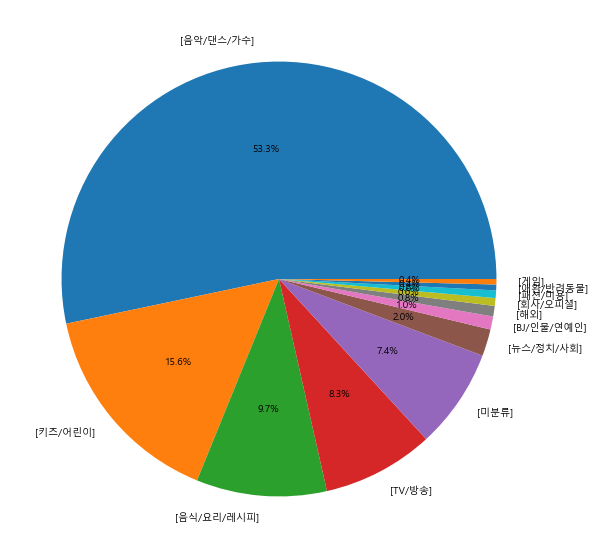

In [41]:
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'],
       autopct='%1.1f%%')
plt.show()